# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

FOR SOME REASON, THE MAX TEMP IS PULLING CRAZY HIGH NUMBERS, FIX THAT AND IT SHOULD FIX YOUR
GRAPHS BELOW. GOOD LUCK.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


NameError: name 'api_key' is not defined

In [92]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [93]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,299.14,71,4,1.34,US,1673129611
1,busselton,-33.6500,115.3333,286.52,89,2,3.48,AU,1673129611
2,ilulissat,69.2167,-51.1000,262.16,67,100,2.57,GL,1673129612
3,castro,-24.7911,-50.0119,289.82,83,73,4.25,BR,1673129612
4,solnechnyy,50.7214,136.6319,249.48,95,97,2.19,RU,1673129613


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,298.76,73,3,0.89,US,1673125628
1,busselton,-33.6500,115.3333,285.83,91,2,3.57,AU,1673125912
2,ilulissat,69.2167,-51.1000,263.16,67,100,1.54,GL,1673125913
3,castro,-24.7911,-50.0119,291.49,81,72,4.56,BR,1673125638
4,solnechnyy,50.7214,136.6319,249.67,95,98,2.19,RU,1673125914


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

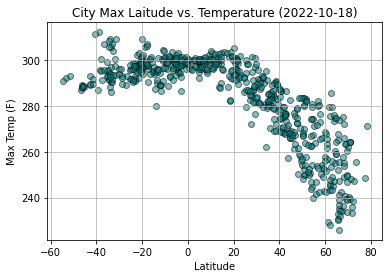

In [17]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitude, temp, facecolor="teal", alpha=0.5, edgecolors="black")
plt.title("City Max Laitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

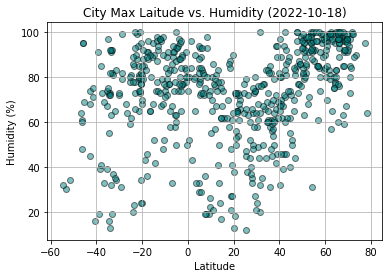

In [74]:
# Build the scatter plots for latitude vs. humidity
x_values=pd.to_numeric(city_data_df["Lat"]).astype(float)
y_values=pd.to_numeric(city_data_df["Humidity"]).astype(float)

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor="teal", alpha=0.5, edgecolors="black")
plt.title("City Max Laitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

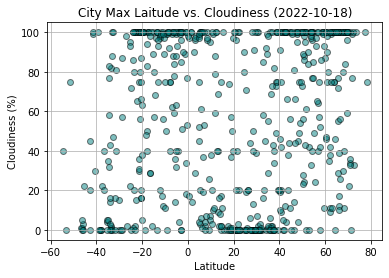

In [73]:
# Build the scatter plots for latitude vs. cloudiness
x_values=pd.to_numeric(city_data_df["Lat"]).astype(float)
y_values=pd.to_numeric(city_data_df["Cloudiness"]).astype(float)

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor="teal", alpha=0.5, edgecolors="black")
plt.title("City Max Laitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

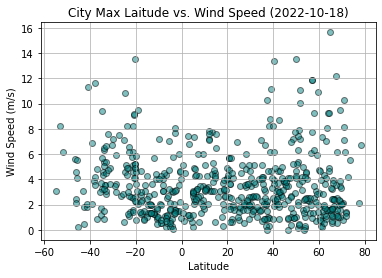

In [75]:
# Build the scatter plots for latitude vs. wind speed
x_values=pd.to_numeric(city_data_df["Lat"]).astype(float)
y_values=pd.to_numeric(city_data_df["Wind Speed"]).astype(float)

# Incorporate the other graph properties
plt.scatter(x_values, y_values, facecolor="teal", alpha=0.5, edgecolors="black")
plt.title("City Max Laitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.75)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [90]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,298.76,73,3,0.89,US,1673125628
1,busselton,-33.6500,115.3333,285.83,91,2,3.57,AU,1673125912
2,ilulissat,69.2167,-51.1000,263.16,67,100,1.54,GL,1673125913
3,castro,-24.7911,-50.0119,291.49,81,72,4.56,BR,1673125638
4,solnechnyy,50.7214,136.6319,249.67,95,98,2.19,RU,1673125914


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
def lin_regress(y_values, x_values, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress= x_values*slope+intercept
    line_equ="y="+str(round(slope,2)) + "x+"+str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress, "r-")
    plt.annotate(line_equ,text_coordinates,fontsize=12,color="red")
    print(f'Regression line equation is : {line_equ}')   

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapaa,22.0752,-159.3190,298.76,73,3,0.89,US,1673125628
2,ilulissat,69.2167,-51.1000,263.16,67,100,1.54,GL,1673125913
4,solnechnyy,50.7214,136.6319,249.67,95,98,2.19,RU,1673125914
5,albany,42.6001,-73.9662,277.01,71,100,0.89,US,1673125914
7,hobyo,5.3505,48.5268,298.46,79,3,7.39,SO,1673125915


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,busselton,-33.6500,115.3333,285.83,91,2,3.57,AU,1673125912
3,castro,-24.7911,-50.0119,291.49,81,72,4.56,BR,1673125638
6,new norfolk,-42.7826,147.0587,289.22,68,0,0.45,AU,1673125914
8,kansanshi,-12.0951,26.4273,288.90,97,97,1.29,ZM,1673125787
11,rikitea,-23.1203,-134.9692,298.87,73,2,6.57,PF,1673125916


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is : y=-0.89x+285.22


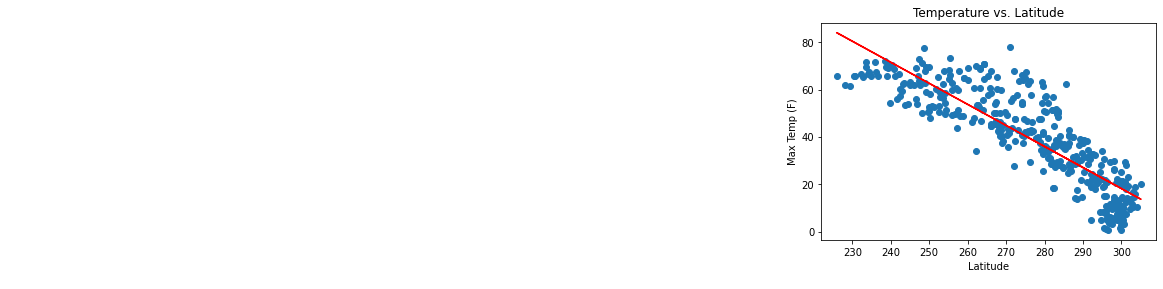

In [89]:
# Linear regression on Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,-20))
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Temperature vs. Latitude")
# plt.annotate(line_eq,coor,fontsize=10,color="red")

plt.show()

The r-value is: 0.4121057168607245


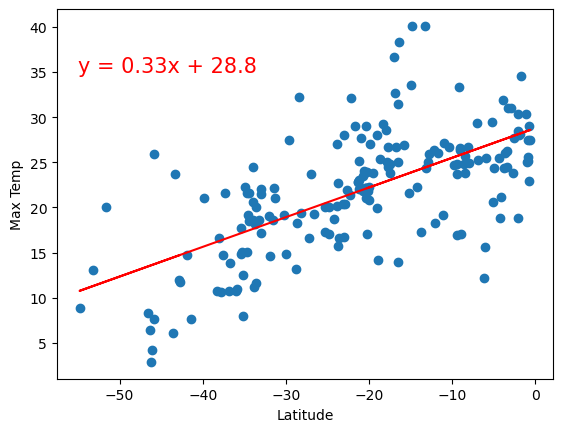

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


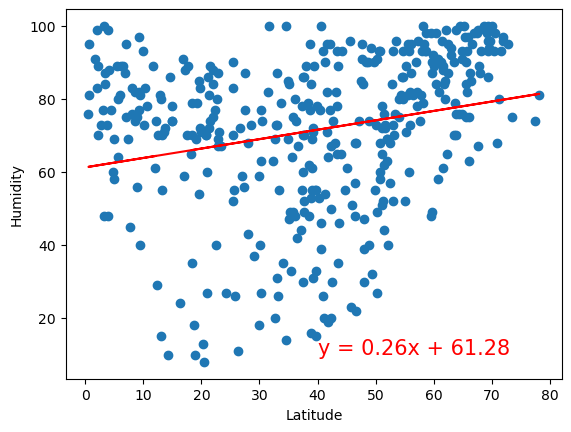

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


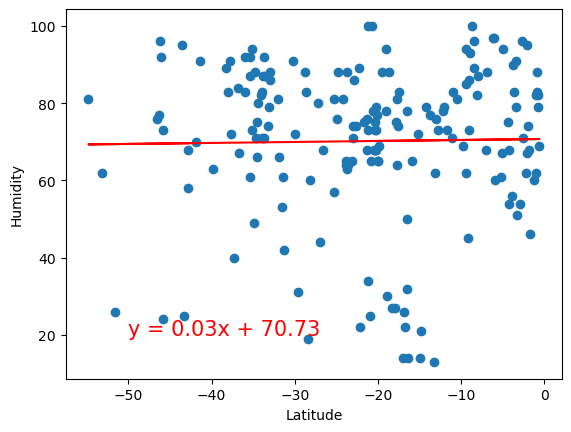

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


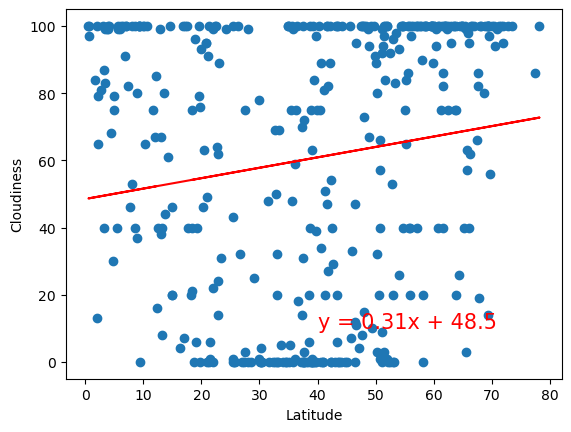

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


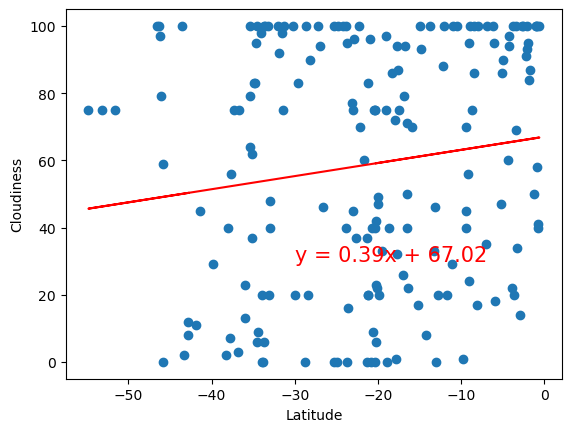

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


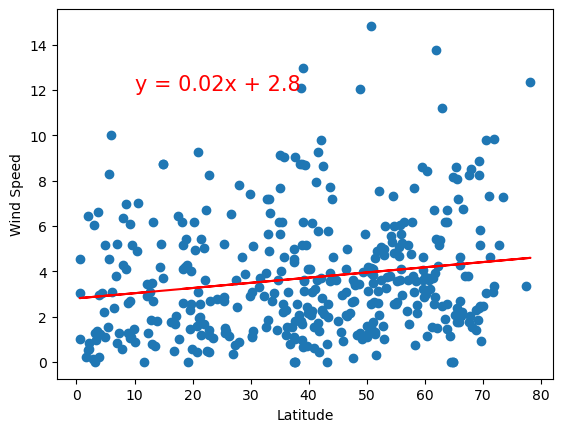

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


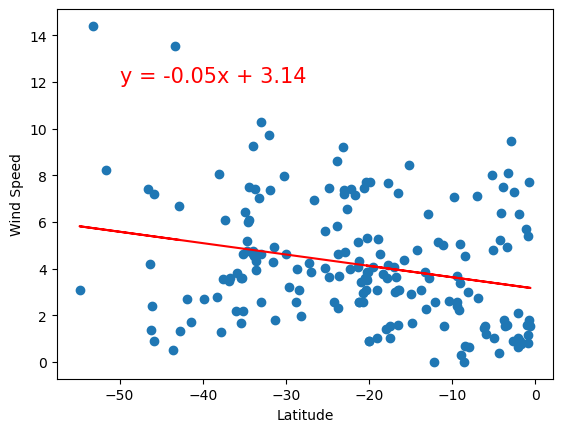

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE